In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
X, y = digits.data, digits.target

In [4]:
X_padded = np.pad(X.reshape((X.shape[0], 8, 8)), pad_width=1, mode='constant')
X_padded = X_padded.reshape((X_padded.shape[0], -1))
X_padded = X_padded[:1797, :]

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

### Perceptron

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [7]:
class Perceptron:
    def __init__(self, input_size, activation_function):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.activation_function = activation_function

    def linear(self, x):
        return x

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, x):
        if self.activation_function == 'linear':
            return self.linear(np.dot(x, self.weights) + self.bias)
        elif self.activation_function == 'sigmoid':
            return self.sigmoid(np.dot(x, self.weights) + self.bias)
        elif self.activation_function == 'relu':
            return self.relu(np.dot(x, self.weights) + self.bias)

    def train(self, X, y, epochs, learning_rate):
        # Initialize lists to store training and validation losses
        training_losses = []
        validation_losses = []

        for epoch in range(epochs):
            # Perform forward pass
            predictions = self.forward(X)

            # Compute cross-entropy loss
            eps = 1e-15  # Small epsilon to avoid log(0) issues
            loss = -np.mean(y * np.log(predictions + eps) + (1 - y) * np.log(1 - predictions + eps))

            # Update weights and bias using SGD
            self.weights -= learning_rate * np.dot(X.T, predictions - y) / len(X)
            self.bias -= learning_rate * np.sum(predictions - y) / len(X)

            # Record training loss
            training_losses.append(loss)

            # Compute validation loss
            val_predictions = self.forward(X_val)
            val_loss = -np.mean(y_val * np.log(val_predictions) + (1 - y_val) * np.log(1 - val_predictions))
            validation_losses.append(val_loss)

            # Print progress
            print(f"Epoch {epoch+1}/{epochs}, Training Loss: {loss}, Validation Loss: {val_loss}")

        return training_losses, validation_losses

In [8]:
activation_functions = ['linear', 'sigmoid', 'relu']
epochs = 30
learning_rate = 0.000001

Epoch 1/30, Training Loss: 155.04001760201558, Validation Loss: 19.85595679542943
Epoch 2/30, Training Loss: 19.902139019500613, Validation Loss: 16.706950008601183
Epoch 3/30, Training Loss: 16.75470624888743, Validation Loss: 14.849286786756553
Epoch 4/30, Training Loss: 14.898233589211841, Validation Loss: 13.520068195805182
Epoch 5/30, Training Loss: 13.57005749221573, Validation Loss: 12.480203007217694
Epoch 6/30, Training Loss: 12.531160875221676, Validation Loss: 11.623187699457546
Epoch 7/30, Training Loss: 11.675073569869681, Validation Loss: 10.892204832504378
Epoch 8/30, Training Loss: 10.944996221534232, Validation Loss: 10.253334726153387
Epoch 9/30, Training Loss: 10.30702021696137, Validation Loss: 9.684694114715777
Epoch 10/30, Training Loss: 9.739269685005192, Validation Loss: 9.171337148042731
Epoch 11/30, Training Loss: 9.226804069806624, Validation Loss: 8.702599652439114
Epoch 12/30, Training Loss: 8.758963211853041, Validation Loss: 8.270603844635758
Epoch 13/30,

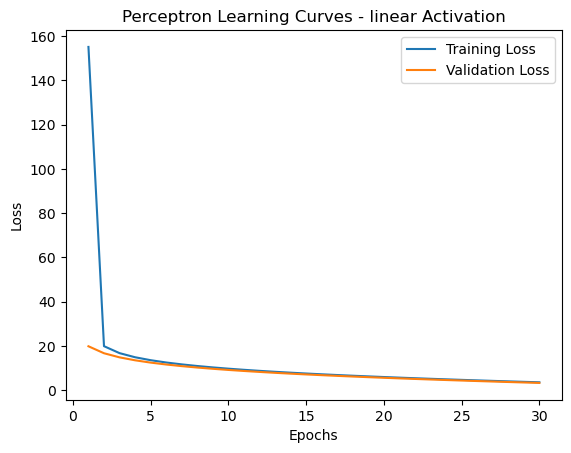

Epoch 1/30, Training Loss: 0.6931471805599434, Validation Loss: 0.6506246881840957
Epoch 2/30, Training Loss: 0.6511796365267825, Validation Loss: 0.6081586954373731
Epoch 3/30, Training Loss: 0.6092679496529959, Validation Loss: 0.565749122924633
Epoch 4/30, Training Loss: 0.5674120413815381, Validation Loss: 0.5233958880373656
Epoch 5/30, Training Loss: 0.5256118300025616, Validation Loss: 0.4810989049797501
Epoch 6/30, Training Loss: 0.4838672306790021, Validation Loss: 0.4388580847953938
Epoch 7/30, Training Loss: 0.4421781554728275, Validation Loss: 0.39667333539473754
Epoch 8/30, Training Loss: 0.40054451337193286, Validation Loss: 0.3545445615831172
Epoch 9/30, Training Loss: 0.3589662103176652, Validation Loss: 0.31247166508945773
Epoch 10/30, Training Loss: 0.3174431492329657, Validation Loss: 0.2704545445955868
Epoch 11/30, Training Loss: 0.2759752300511065, Validation Loss: 0.22849309576615065
Epoch 12/30, Training Loss: 0.23456234974501336, Validation Loss: 0.18658721127911

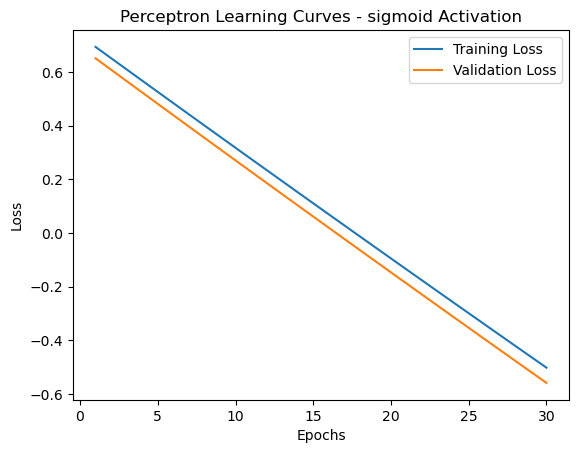

Epoch 1/30, Training Loss: 155.04001760201558, Validation Loss: 19.85595679542943
Epoch 2/30, Training Loss: 19.902139019500613, Validation Loss: 16.706950008601183
Epoch 3/30, Training Loss: 16.75470624888743, Validation Loss: 14.849286786756553
Epoch 4/30, Training Loss: 14.898233589211841, Validation Loss: 13.520068195805182
Epoch 5/30, Training Loss: 13.57005749221573, Validation Loss: 12.480203007217694
Epoch 6/30, Training Loss: 12.531160875221676, Validation Loss: 11.623187699457546
Epoch 7/30, Training Loss: 11.675073569869681, Validation Loss: 10.892204832504378
Epoch 8/30, Training Loss: 10.944996221534232, Validation Loss: 10.253334726153387
Epoch 9/30, Training Loss: 10.30702021696137, Validation Loss: 9.684694114715777
Epoch 10/30, Training Loss: 9.739269685005192, Validation Loss: 9.171337148042731
Epoch 11/30, Training Loss: 9.226804069806624, Validation Loss: 8.702599652439114
Epoch 12/30, Training Loss: 8.758963211853041, Validation Loss: 8.270603844635758
Epoch 13/30,

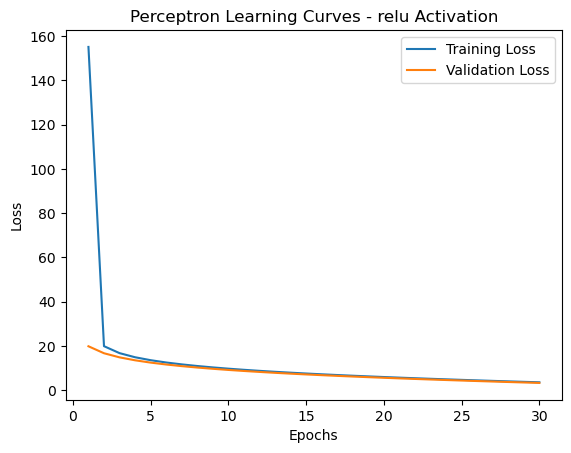

In [9]:
for activation_function in activation_functions:
    perceptron = Perceptron(input_size=X_train.shape[1], activation_function=activation_function)
    training_losses, validation_losses = perceptron.train(X_train, y_train, epochs, learning_rate)
    
    test_predictions = perceptron.forward(X_test)
    binary_predictions = np.round(test_predictions)
    f1 = f1_score(y_test, binary_predictions, average='weighted')    
    print(f"F1 Score: {f1}")

    # Plot learning curves
    plt.plot(range(1, epochs+1), training_losses, label='Training Loss')
    plt.plot(range(1, epochs+1), validation_losses, label='Validation Loss')
    plt.title(f'Perceptron Learning Curves - {activation_function} Activation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### Neural Network

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder

In [11]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

X = X / 255.0
y = y.values.astype(int)
y = y.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y)

X_train, X_test, y_train_one_hot, y_test_one_hot = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

/Users/ikram/anaconda3/envs/UNT/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/Users/ikram/anaconda3/envs/UNT/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation_function):
        # Initialize weights and biases for hidden and output layers
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros(output_size)
        self.activation_function = activation_function

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, x):
        # Forward pass through hidden layer
        hidden_input = np.dot(x, self.weights_hidden) + self.bias_hidden
        if self.activation_function == 'sigmoid':
            hidden_output = self.sigmoid(hidden_input)
        else:
            # Default to sigmoid if unknown activation function
            hidden_output = self.sigmoid(hidden_input)

        # Forward pass through output layer
        output_input = np.dot(hidden_output, self.weights_output) + self.bias_output
        output_output = self.softmax(output_input)

        return hidden_output, output_output

    def train(self, X, y, epochs, learning_rate):
        # Initialize lists to store training and validation losses
        training_losses = []

        for epoch in range(epochs):
            # Perform forward pass
            hidden_output, output_output = self.forward(X)

            # Compute cross-entropy loss
            eps = 1e-15  # Small epsilon to avoid log(0) issues
            loss = -np.mean(y * np.log(output_output + eps))

            # Update weights and biases using backpropagation and SGD
            error_output = output_output - y
            gradient_output = hidden_output.T.dot(error_output)
            self.weights_output -= learning_rate * gradient_output
            self.bias_output -= learning_rate * np.sum(error_output, axis=0)

            error_hidden = error_output.dot(self.weights_output.T) * hidden_output * (1 - hidden_output)
            gradient_hidden = X.T.dot(error_hidden)
            self.weights_hidden -= learning_rate * gradient_hidden
            self.bias_hidden -= learning_rate * np.sum(error_hidden, axis=0)

            # Record training loss
            training_losses.append(loss)

            # Print progress
            print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {loss}")

        return training_losses

In [13]:
# Training and Evaluation for each activation function
activation_functions = ['sigmoid']
hidden_size = 128
output_size = 10
epochs = 30
learning_rate = 0.01

Epoch 1/30, Training Loss: 1.1615762593029328
Epoch 2/30, Training Loss: 3.066734961935974
Epoch 3/30, Training Loss: 3.096771362122263
Epoch 4/30, Training Loss: 3.1123138114999724
Epoch 5/30, Training Loss: 3.1166311585493367
Epoch 6/30, Training Loss: 3.1128688989777475
Epoch 7/30, Training Loss: 3.110956930998744
Epoch 8/30, Training Loss: 3.1158910419123025
Epoch 9/30, Training Loss: 3.10787311167777
Epoch 10/30, Training Loss: 3.1018288258086604
Epoch 11/30, Training Loss: 3.1430286519368753
Epoch 12/30, Training Loss: 3.066734961935974
Epoch 13/30, Training Loss: 3.096771362122263
Epoch 14/30, Training Loss: 3.1123138114999724
Epoch 15/30, Training Loss: 3.1128688989777475
Epoch 16/30, Training Loss: 3.110956930998744
Epoch 17/30, Training Loss: 3.1166311585493367
Epoch 18/30, Training Loss: 3.1158910419123025
Epoch 19/30, Training Loss: 3.10787311167777
Epoch 20/30, Training Loss: 3.1018288258086604
Epoch 21/30, Training Loss: 3.1430286519368753
Epoch 22/30, Training Loss: 3.06

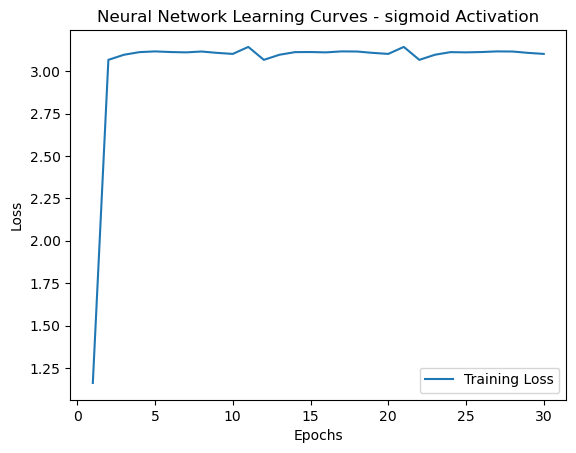

F1 Score: 0.0151577386798365


In [14]:
for activation_function in activation_functions:
    nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=output_size,
                       activation_function=activation_function)
    training_losses = nn.train(X_train, y_train_one_hot, epochs, learning_rate)

    # Plot learning curves
    plt.plot(range(1, epochs + 1), training_losses, label='Training Loss')
    plt.title(f'Neural Network Learning Curves - {activation_function} Activation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate performance on the test set
    _, test_predictions = nn.forward(X_test)
    # Convert one-hot encoded predictions to class labels
    predicted_labels = np.argmax(test_predictions, axis=1)
    true_labels = np.argmax(y_test_one_hot, axis=1)
    # Calculate F1 score
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    print(f"F1 Score: {f1}")

### Convolutional Neural Network

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=4)
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=9, kernel_size=3)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(4761, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.softmax(x)
        return x

In [17]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# Split the data into training and test sets
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
val_loader = DataLoader(mnist_val, batch_size=64, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)

In [18]:
# Initialize the CNN model
cnn = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)
epochs = 10

for epoch in range(epochs):
    # Training
    cnn.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn(inputs.unsqueeze(1))  # Add a channel dimension to the input
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    cnn.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs, labels in val_loader:
            outputs = cnn(inputs.unsqueeze(1))
            val_loss += criterion(outputs, labels)
    print(f"Epoch {epoch + 1}/{epochs}, Validation Loss: {val_loss / len(val_loader)}")

Epoch 1/10, Validation Loss: 1.7500547170639038
Epoch 2/10, Validation Loss: 1.586069941520691
Epoch 3/10, Validation Loss: 1.5678282976150513
Epoch 4/10, Validation Loss: 1.558513879776001
Epoch 5/10, Validation Loss: 1.5528408288955688
Epoch 6/10, Validation Loss: 1.5490866899490356
Epoch 7/10, Validation Loss: 1.5463733673095703
Epoch 8/10, Validation Loss: 1.5448253154754639
Epoch 9/10, Validation Loss: 1.541280746459961
Epoch 10/10, Validation Loss: 1.5380196571350098


In [19]:
cnn.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = cnn(inputs.unsqueeze(1))
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='micro')
print(f"F1 Score: {f1}")

F1 Score: 0.9307
